# 检查训练集数据平衡问题（正负，长度）以及正确性（分类，长度）
# 检查测试集正确性（分类，长度）
# 检查测试集1不出现在训练集中

## 分类，长度检测


In [1]:
import pandas as pd
from Tomita import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
subt = list(map(str, range(1, 8)))

subd = list(map(str, range(5)))

length = [32, 32, 64, 128, 256]
for i in subt:
    for j in subd:
        ij = int(j)
        tot = "train" if j == "0" else ("test" + j)
        name = "T" + i + "_" + tot
        data = pd.read_csv("./" + name, header=None, index_col=None, dtype={1: str})
        dl = data.values.tolist()
        length_err = 0
        class_err = 0
        no_e = 0
        gname = "g" + i
        g = globals()[gname]
        for sample in dl:
            s = sample[0]
            label = sample[1]
            if len(s)!= length[ij] or len(label)!= length[ij]:
                length_err += 1
            sindex = 1
            eindex = s.find("e")
            if eindex != -1:
                plabel2, _ = g.accept(
                    s[sindex: eindex]
                )
                plabel = "0" + plabel2 + plabel2[-1] * (length[int(j)] - 1 - len(plabel2))
                if plabel != label:
                    class_err += 1
            else:
                no_e += 1
        print(name, len(dl), length_err, class_err, no_e)

T1_train 20000 0 0 0
T1_test1 1000 0 0 0
T1_test2 1000 0 0 0
T1_test3 1000 0 0 0
T1_test4 1000 0 0 0
T2_train 20000 0 0 0
T2_test1 1000 0 0 0
T2_test2 1000 0 0 0
T2_test3 1000 0 0 0
T2_test4 1000 0 0 0
T3_train 20000 0 0 0
T3_test1 1000 0 0 0
T3_test2 1000 0 0 0
T3_test3 1000 0 0 0
T3_test4 1000 0 0 0
T4_train 20000 0 0 0
T4_test1 1000 0 0 0
T4_test2 1000 0 0 0
T4_test3 1000 0 0 0
T4_test4 1000 0 0 0
T5_train 20000 0 0 0
T5_test1 1000 0 0 0
T5_test2 1000 0 0 0
T5_test3 1000 0 0 0
T5_test4 1000 0 0 0
T6_train 20000 0 0 0
T6_test1 1000 0 0 0
T6_test2 1000 0 0 0
T6_test3 1000 0 0 0
T6_test4 1000 0 0 0
T7_train 20000 0 0 0
T7_test1 1000 0 0 0
T7_test2 1000 0 0 0
T7_test3 1000 0 0 0
T7_test4 1000 0 0 0


# 数据平衡检测

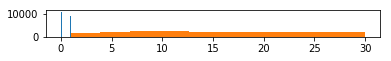

Continue


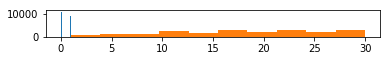

Continue


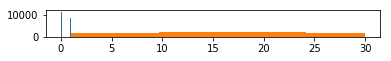

Continue


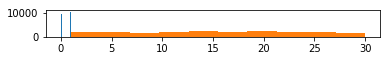

Continue


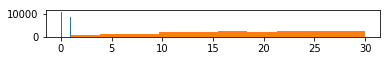

Continue


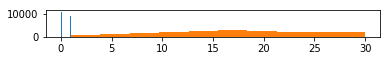

Continue


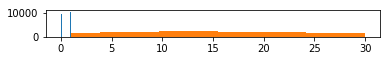

Continue


In [4]:

plt.subplot()
subj = list(range(1, 8))
for i in subj:
    name = "T" + str(i) + "_train"

    data = pd.read_csv(name, header=None, index_col=None, dtype={1: str})
    data = data.values.tolist()
    length = [len(sample[0][1: sample[0].find("e")]) for sample in data]
    pn = [int(sample[1][-1]) for sample in data]
    loc = "71" + str(i)
    plt.subplot(int(loc))
    plt.hist(pn)
    plt.hist(length)
    plt.show()
    input("Continue")

In [48]:




train = pd.read_csv("T6_train", header=None, index_col=None, dtype={1: str})

train = train.values.tolist()
trainp = list()
trainn = list()
for sample in train:
    if sample[1][-1] == "1":
        trainp.append(sample)
    else:
        trainn.append(sample)
trainn = trainn * 2
trainpd = pd.DataFrame(trainp)
trainnd = pd.DataFrame(trainn)
trainpd = trainpd.sample(9000)
trainnd = trainnd.sample(11000)
train = trainpd.append(trainnd)

In [50]:
train.to_csv("T6_train", header=None, index=None)

# 重复检测

In [5]:
subj = list(range(1, 8))
for i in subj:
    duplicate_err = 0
    si = str(i)
    trname = "T" + si + "_train"
    tename = "T" + si + "_test1"
    train = pd.read_csv(trname, header=None, index_col=None, dtype={1: str})
    test = pd.read_csv(tename, header=None, index_col=None, dtype={1: str})
    train = train.values.tolist()
    test = test.values.tolist()
    train = [(sample[0], sample[1]) for sample in train]
    test = [(sample[0], sample[1]) for sample in test]
    for sample in test:
        if sample in train:
            duplicate_err += 1
    print(tename, duplicate_err)

T1_test1 0
T2_test1 0
T3_test1 0
T4_test1 0
T5_test1 0
T6_test1 0
T7_test1 0


In [54]:
subj = list(range(1, 8))
for i in subj:
    duplicate_err = 0
    non_duplicate = list()
    si = str(i)
    trname = "T" + si + "_train"
    tename = "T" + si + "_test1"
    train = pd.read_csv(trname, header=None, index_col=None, dtype={1: str})
    test = pd.read_csv(tename, header=None, index_col=None, dtype={1: str})
    train = train.values.tolist()
    test = test.values.tolist()
    train = [(sample[0], sample[1]) for sample in train]
    test = [(sample[0], sample[1]) for sample in test]
    for sample in test:
        if sample in train:
            duplicate_err += 1
        else:
            non_duplicate.append(sample)
    if duplicate_err != 0:
        non_duplicate = non_duplicate * 2
        test = pd.DataFrame(non_duplicate).sample(1000)
        test.to_csv(tename, header=None, index=None)
    print(tename, duplicate_err)

T1_test1 0
T2_test1 175
T3_test1 0
T4_test1 0
T5_test1 0
T6_test1 470
T7_test1 123
